In [2]:
import sys
sys.path.insert(0, r'../..')

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import imageio
from tqdm import tqdm_notebook as tqdm

In [4]:
from lib.video import *

In [104]:
TEST_VIDEO = '../../data/train/resized_643734_5.mp4'
TEST_VIDEO = '../../data/train/resized_641579_3.mp4'

In [130]:
SHAPE_VIDEO = next(get_reader(TEST_VIDEO)).shape
FRAME_RATE = 4
SKIP = 0
SIZE = None
GOOD_COLORS = [0, 1, 2]

In [131]:
def calc_green_pixels(frame):
    frame = frame.astype('float')
    return frame[:, :, 1] * 2 > frame[:, :, 0] + frame[:, :, 2]


def calc_green_counts(path):
    total = 0
    mask = np.zeros(SHAPE_VIDEO[:2])
    for frame in tqdm(get_reader(path, FRAME_RATE, skip=SKIP, size=SIZE),
                      total=get_total_len(TEST_VIDEO, FRAME_RATE, skip=SKIP, size=SIZE)):
        mask += calc_green_pixels(frame)
        total += 1
    return mask / total

In [132]:
green_counts = calc_green_counts(TEST_VIDEO)

A Jupyter Widget

In [133]:
def extract_green_mask(green_counts, threshold=0.24):
    return green_counts < threshold

In [134]:
def clean_borders(mask, size=4):
    mask = mask.copy()
    h, w = mask.shape[:2]
    borders = np.ones_like(mask)
    borders[size:-size, size:-size] = 0
    mask[borders] = 0
    return mask

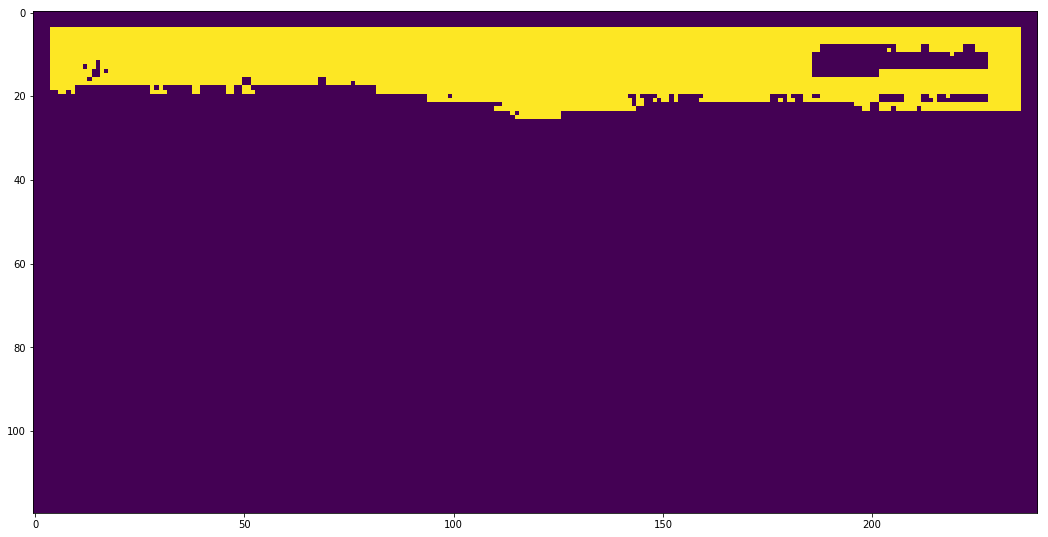

In [135]:
ui_mask = extract_green_mask(green_counts, 0.4)
ui_mask = clean_borders(ui_mask)
show_img(ui_mask)

In [136]:
def transfrom_color(color, k=5):
    return tuple(color // k * k)

In [137]:
from collections import defaultdict, Counter

good_colors = defaultdict(Counter)
total = 0
for frame in tqdm(get_reader(TEST_VIDEO, FRAME_RATE, skip=SKIP, size=SIZE),
                  total=get_total_len(TEST_VIDEO, FRAME_RATE, skip=SKIP, size=SIZE)):
    for i in range(ui_mask.shape[0]):
        for j in range(ui_mask.shape[1]):
            if ui_mask[i, j]:
                good_colors[i, j][transfrom_color(frame[i, j])] += 1
    total += 1

A Jupyter Widget

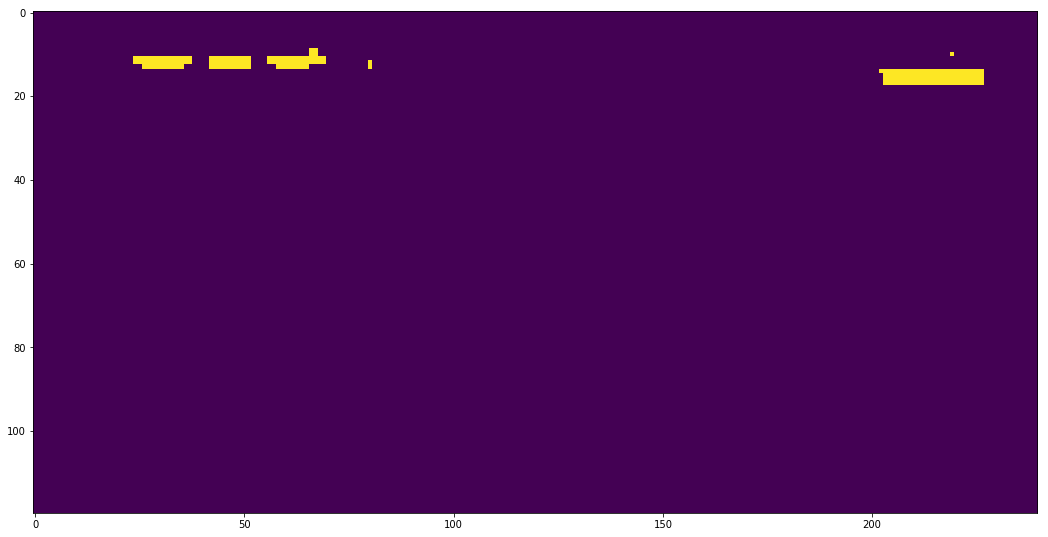

In [138]:
N_TOP_COLORS = 50
nmask = np.zeros_like(ui_mask)
for pixel, counter in good_colors.items():
    mc = counter.most_common(N_TOP_COLORS)
    prob = sum(v for k, v in mc) / total
    if prob > 0.5:
        nmask[pixel] = 1
show_img(nmask)

In [139]:
N_TOP_COLORS = 50
rgood_colors = {
    pixel: {k for k, v in counter.most_common(N_TOP_COLORS)} 
    for pixel, counter in good_colors.items()
    if nmask[pixel]
}

In [140]:
dx = [0, 0, 1, -1, -1, 1, 1, -1]
dy = [1, -1, 0, 0, -1, 1, -1, 1]

In [141]:
def sim_ui(frame, good_colors, mask):
    simularity = np.zeros_like(mask, dtype='uint8')
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i, j]:
                if transfrom_color(frame[i, j]) in good_colors[i, j]:
                    for k in range(len(dx)):
                        p = i+dx[k], j+dy[k]
                        if mask[p]:
                            simularity[p] = 2
                else:
                    if simularity[i, j] == 0:
                        simularity[i, j] = 1
    sim = (simularity == 2).sum() / mask.sum()
    return sim

In [142]:
sims = []
for frame in tqdm(get_reader(TEST_VIDEO, FRAME_RATE, skip=SKIP, size=SIZE),
                  total=get_total_len(TEST_VIDEO, FRAME_RATE, skip=SKIP, size=SIZE)):
    sim = sim_ui(frame, rgood_colors, nmask)
    sims.append(sim)

A Jupyter Widget

False 0.360576923077
False 0.466346153846
False 0.466346153846
False 0.466346153846
False 0.466346153846
False 0.466346153846
False 0.533653846154
False 0.495192307692
False 0.466346153846
False 0.490384615385
False 0.533653846154
False 0.504807692308
False 0.466346153846
False 0.466346153846
False 0.466346153846
False 0.466346153846
False 0.466346153846
True 0.980769230769
True 0.980769230769
True 0.975961538462
True 0.980769230769
True 0.980769230769
True 0.975961538462
True 0.980769230769
True 0.980769230769
True 0.980769230769
True 0.971153846154
True 0.985576923077
True 0.975961538462
True 0.985576923077
True 0.971153846154
True 0.995192307692
True 0.971153846154
True 0.956730769231
True 0.985576923077
True 0.975961538462
True 0.980769230769
True 0.985576923077
True 0.975961538462
True 0.975961538462
True 0.980769230769
True 0.985576923077
True 0.975961538462
True 0.985576923077
True 0.985576923077
False 0.466346153846
True 0.971153846154
True 0.956730769231
True 0.971153846154
Tr

True 0.995192307692
True 0.990384615385
True 0.918269230769
True 0.990384615385
True 0.995192307692
True 0.990384615385
True 0.990384615385
True 0.995192307692
True 0.995192307692
True 0.995192307692
False 0.572115384615
True 0.985576923077
True 0.985576923077
False 0.548076923077
False 0.466346153846
True 0.990384615385
True 0.995192307692
True 0.995192307692
True 0.985576923077
True 0.990384615385
True 0.985576923077
True 0.990384615385
True 0.985576923077
True 0.980769230769
True 0.975961538462
True 0.995192307692
True 0.980769230769
True 0.995192307692
True 0.990384615385
True 0.932692307692
True 0.995192307692
True 0.990384615385
True 0.956730769231
True 0.990384615385
True 0.995192307692
False 0.466346153846
False 0.504807692308
False 0.466346153846
True 0.995192307692
True 0.995192307692
True 0.995192307692
True 0.990384615385
True 0.995192307692
True 0.995192307692
True 0.995192307692
True 0.995192307692
True 0.985576923077
True 0.995192307692
True 0.990384615385
True 0.9951923

False 0.466346153846
True 0.980769230769
True 0.975961538462
True 0.985576923077
False 0.466346153846
False 0.466346153846
False 0.490384615385
False 0.519230769231
False 0.480769230769
False 0.567307692308
True 0.975961538462
True 0.995192307692
True 0.980769230769
False 0.490384615385
True 0.990384615385
True 0.961538461538
False 0.586538461538
False 0.629807692308
False 0.466346153846
False 0.466346153846
False 0.466346153846
True 0.980769230769
True 0.951923076923
True 0.995192307692
False 0.466346153846
True 0.971153846154
True 0.951923076923
False 0.466346153846
False 0.466346153846
False 0.485576923077
True 0.990384615385
True 0.985576923077
True 0.995192307692
False 0.466346153846
False 0.466346153846
True 0.995192307692
True 0.975961538462
True 0.975961538462
True 0.985576923077
False 0.466346153846
True 0.985576923077
True 0.975961538462
True 0.990384615385
True 0.995192307692
True 0.995192307692
True 0.975961538462
True 0.980769230769
False 0.644230769231
False 0.64423076923

False 0.466346153846
True 0.975961538462
True 0.985576923077
True 0.975961538462
True 0.995192307692
True 0.990384615385
True 0.980769230769
True 0.995192307692
True 0.966346153846
True 0.990384615385
True 0.995192307692
True 0.990384615385
True 0.995192307692
False 0.466346153846
False 0.466346153846
False 0.490384615385
True 0.995192307692
True 0.985576923077
True 0.995192307692
True 0.995192307692
True 0.990384615385
True 0.990384615385
True 0.990384615385
True 0.990384615385
True 0.995192307692
True 0.990384615385
True 0.980769230769
True 0.995192307692
True 0.975961538462
True 0.995192307692
True 0.995192307692
True 0.995192307692
True 0.990384615385
True 0.990384615385
True 0.995192307692
True 0.990384615385
True 0.980769230769
False 0.490384615385
False 0.466346153846
False 0.490384615385
False 0.466346153846
False 0.480769230769
False 0.572115384615
False 0.504807692308
True 0.995192307692
True 0.995192307692
True 0.995192307692
True 0.966346153846
True 0.995192307692
True 0.94

False 0.514423076923
False 0.552884615385
False 0.855769230769
True 0.990384615385
True 0.975961538462
True 0.995192307692
True 0.995192307692
True 0.995192307692
True 0.995192307692
True 0.961538461538
True 0.995192307692
True 0.990384615385
True 0.975961538462
True 0.995192307692
False 0.495192307692
False 0.466346153846
False 0.480769230769
True 0.995192307692
True 0.985576923077
True 0.995192307692
True 0.995192307692
True 0.966346153846
True 0.985576923077
True 0.995192307692
True 0.980769230769
True 0.995192307692
True 0.995192307692
True 0.995192307692
True 0.985576923077
True 0.990384615385
True 0.995192307692
True 0.975961538462
True 0.995192307692
True 0.995192307692
False 0.557692307692
True 0.985576923077
True 0.975961538462
True 0.985576923077
True 0.990384615385
True 0.990384615385
False 0.490384615385
False 0.466346153846
True 0.995192307692
True 0.995192307692
False 0.576923076923
False 0.615384615385
True 0.995192307692
True 0.995192307692
True 0.995192307692
True 0.99

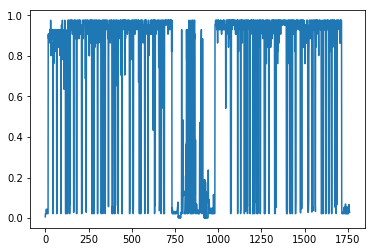

In [143]:
plt.plot(np.array(sims) ** 5)

In [152]:
def find_start(sims, frame_rate):
    l =  45 * 60 // frame_rate
    n = len(sims)
    pref = np.cumsum(np.array(sims) > 0.85)
    mx = -1
    best_l1, best_l2 = -1, -1
    for l1 in range(n - l):
        for l2 in range(l1 + l, n - l):
            s1, s2 = pref[l1 + l] - pref[l1], pref[l2 + l] - pref[l2]
            s = s1 + s2
            if mx < s1 + s2:
                mx = s1 + s2
                best_l1, best_l2 = l1, l2
    return best_l1 * frame_rate, best_l2 * frame_rate

In [153]:
find_start(sims, 4)

(180, 3920)